# Isolation Forest con Scikit-learn

In [3]:
import numpy as np
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.0, random_state=1234)
X = np.concatenate([X, np.random.uniform(low=-10, high=10, size=(20, 2))], axis=0)

y = np.ones(X.shape[0])
y[-20:] = -1

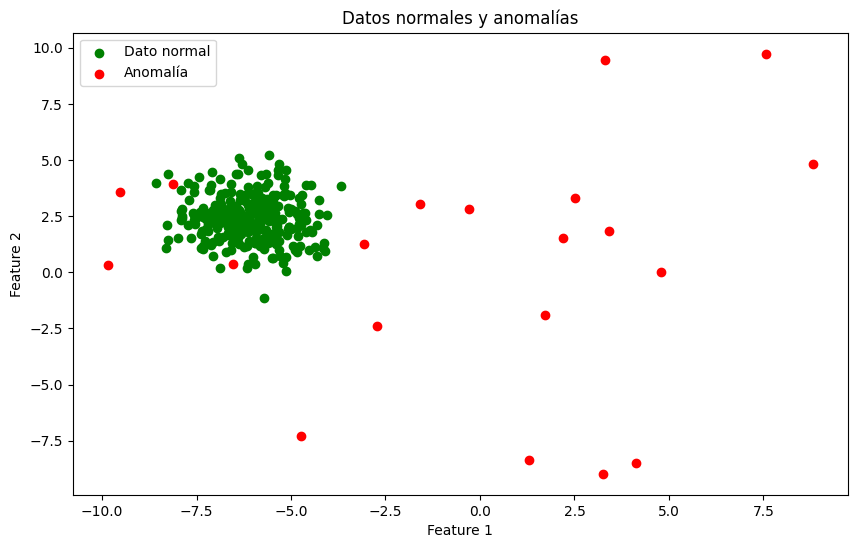

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c="green", label="Dato normal")
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c="red", label="Anomalía")
plt.title("Datos normales y anomalías")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1234)

In [8]:
# TODO: Importa la clase IsolationForest de sklearn
from sklearn.ensemble import IsolationForest

# TODO: Inicializar un IsolationForest y entrenarlo
iso_forest = IsolationForest(random_state=1234)
iso_forest.fit(X_train)

IsolationForest(random_state=1234)

In [9]:
# TODO: Obtener los scores de anomalía de cada dato en validación
scores_pred_val = iso_forest.decision_function(X_val)

In [12]:
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = 0
thresholds = np.linspace(scores_pred_val.min(), scores_pred_val.max(), 100)

for threshold in thresholds:
  # TODO: Comparar scores_pred_val con el threshold. Si es menor que el
  # threshold, devolver -1 (anomalía), en otro caso devolver 1.
  # TIP: Utilizar np.where
  y_pred_val_threshold = np.where(scores_pred_val < threshold, -1, 1)

  # TODO: Obtener el valor de F1
  f1 = f1_score(y_val, y_pred_val_threshold)

  if f1 > best_f1:
    best_f1 = f1
    best_threshold = threshold

In [13]:
print("Mejor umbral:", best_threshold)
print("Mejor valor de F1:", best_f1)

Mejor umbral: -0.03740168079148798
Mejor valor de F1: 1.0
